In [93]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [95]:
data_w2 = pd.read_csv('06_07_2021/ue3_p20_pt_w2.csv')
data_w3 = pd.read_csv('06_07_2021/ue3_p20_pt_w3.csv')
data_w4 = pd.read_csv('06_07_2021/ue3_p20_pt_w4.csv')

colors_list = ["lightslategray", "orchid","paleturquoise" , "mediumseagreen","red","slateblue","yellow"]
colors_list_old = ["paleturquoise" , "red","mediumseagreen","slategray","darkblue","lightpink"]
hatches=["\\",".","+","|","-","/","x"]
linestyles = ['-+','-*',':','--','.-','-']
dashList = [(5,2),(2,0),(1,1),(3,3,2,2),(5,2,20,2),(10,5,20,5)] 
#QoE 6
#ThreadId 10

# Comparison of average QoE

In [96]:
QOE = []
errQoE = []
weights = ["h2","h3","h4"]

avg_QOE_w2=sum(data_w2.get("QoE").to_numpy())/len(data_w2.get("QoE").to_numpy())
std_QoE_w2=np.std(data_w2.get("QoE").to_numpy())
avg_QOE_w3=sum(data_w3.get("QoE").to_numpy())/len(data_w3.get("QoE").to_numpy())
std_QoE_w3=np.std(data_w3.get("QoE").to_numpy())
avg_QOE_w4=sum(data_w4.get("QoE").to_numpy())/len(data_w4.get("QoE").to_numpy())
std_QoE_w4=np.std(data_w4.get("QoE").to_numpy())
QOE.append(avg_QOE_w2)
QOE.append(avg_QOE_w3)
QOE.append(avg_QOE_w4)
errQoE.append(std_QoE_w2)
errQoE.append(std_QoE_w3)
errQoE.append(std_QoE_w4)

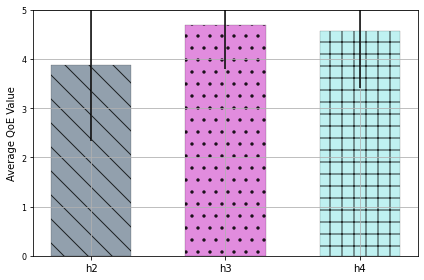

In [97]:
fig, ax_array = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

ax = ax_array

width = 0.6
rects1 = ax.bar([x+0.5*width for x in range(len(weights))],QOE, width, color=colors_list,alpha=0.8,edgecolor="black",lw=0.2,hatch=hatches,yerr=errQoE)
ax.grid(True)

for bar, pattern in zip(rects1, hatches):
    bar.set_hatch(pattern)

ax.set_ylabel("Average QoE Value",fontsize=10)
ax.set_ylim([0,5])
plt.sca(ax)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.xticks([x+0.3 for x in range(len(weights))], weights,fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig("qoe_mobility_comp_656.jpg",dpi=300)

# Comparison of client QoE CDF

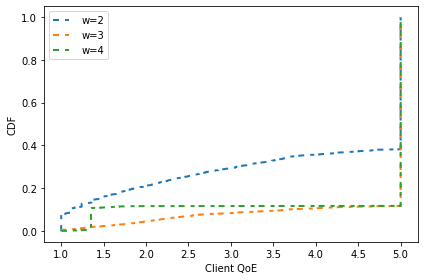

In [98]:
cdf_QoE_w2=data_w2.get("QoE").to_numpy()
cdf_QoE_w3=data_w3.get("QoE").to_numpy()
cdf_QoE_w4=data_w4.get("QoE").to_numpy()

plt.plot(np.sort(cdf_QoE_w2), np.linspace(0, 1, len(cdf_QoE_w2), endpoint=False),dashes=dashList[3],lw=2,label='w=2')
plt.plot(np.sort(cdf_QoE_w3), np.linspace(0, 1, len(cdf_QoE_w3), endpoint=False),dashes=dashList[3],lw=2,label='w=3')
plt.plot(np.sort(cdf_QoE_w4), np.linspace(0, 1, len(cdf_QoE_w4), endpoint=False),dashes=dashList[3],lw=2,label='w=4')
plt.ylabel("CDF",fontsize=10)
plt.xlabel("Client QoE",fontsize=10)
plt.gca().legend()
plt.tight_layout()
plt.savefig("qoe_cdf_jrnl.jpg",dpi=300)

# Comparison of average QoE CDF

4.030496130048991
4.679185487693475
4.802408315400213


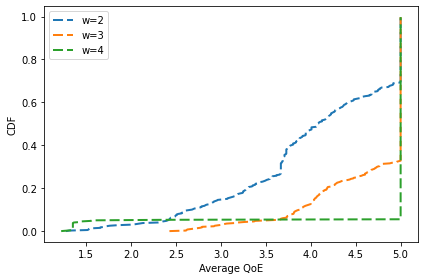

In [99]:
avgW2 = []
avgW3 = []
avgW4 = []
for i in range(0,2400,6):
    tmpW2 = 0.0
    tmpW3 = 0.0
    tmpW4 = 0.0
    if (i+6>=2400):
        continue
    for j in range(i,i+6):
        tmpW2 += cdf_QoE_w2[j]
        tmpW3 += cdf_QoE_w3[j]
        tmpW4 += cdf_QoE_w4[j]
    avgW2.append(tmpW2/6)
    avgW3.append(tmpW3/6)
    avgW4.append(tmpW4/6)
print (sum(avgW2)/len(avgW2))
print (sum(avgW3)/len(avgW3))
print (sum(avgW4)/len(avgW4))

plt.plot(np.sort(avgW2), np.linspace(0, 1, len(avgW2), endpoint=False),dashes=dashList[0],lw=2,label='w=2')
plt.plot(np.sort(avgW3), np.linspace(0, 1, len(avgW3), endpoint=False),dashes=dashList[0],lw=2,label='w=3')
plt.plot(np.sort(avgW4), np.linspace(0, 1, len(avgW4), endpoint=False),dashes=dashList[0],lw=2,label='w=4')

plt.ylabel("CDF",fontsize=10)
plt.xlabel("Average QoE",fontsize=10)
plt.gca().legend()
plt.tight_layout()
plt.savefig("qoe_cdf_avg_jrnl.jpg",dpi=300)

# Comparison of average Buffer

In [100]:
BUF = []
weights = ["h2","h3","h4"]

avg_BUF_w2=sum(data_w2.get("buffer_state").to_numpy())/len(data_w2.get("buffer_state").to_numpy())
avg_BUF_w3=sum(data_w3.get("buffer_state").to_numpy())/len(data_w3.get("buffer_state").to_numpy())
avg_BUF_w4=sum(data_w4.get("buffer_state").to_numpy())/len(data_w4.get("buffer_state").to_numpy())
BUF.append(avg_BUF_w2)
BUF.append(avg_BUF_w3)
BUF.append(avg_BUF_w4)

In [ ]:
fig, ax_array = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

ax = ax_array

width = 0.6
rects1 = ax.bar([x+0.5*width for x in range(len(weights))],BUF, width, color=colors_list,alpha=0.8,edgecolor="black",lw=0.2,hatch=hatches)
ax.grid(True)

for bar, pattern in zip(rects1, hatches):
    bar.set_hatch(pattern)

ax.set_ylabel("Average QoE Value",fontsize=10)
ax.set_ylim([0,5])
plt.sca(ax)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.xticks([x+0.3 for x in range(len(weights))], weights,fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig("buf_mobility_comp_656.jpg",dpi=300)

# Comparison of client Buffer CDF

#  Comparison of average Buffer CDF